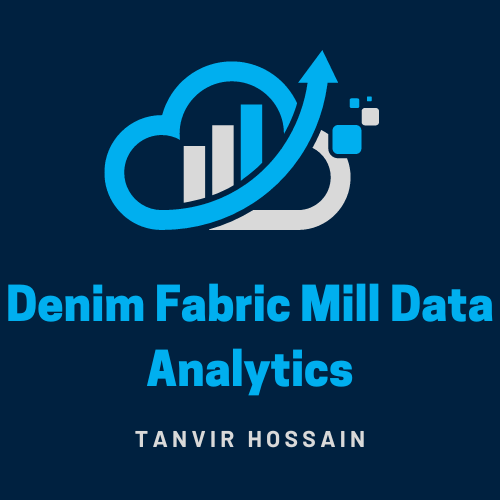

In [1]:
from IPython.display import Image
Image(filename='Cloud analytic logo design template.png',height=500,width=500)

# Weving Technology(Introduction)

### Weaving is one of the oldest crafts in the world dated back 12,000 years ago.It is one of the primary method of producing textile where two sets of yarns are interlaced together at right angle to produce a flexible planner substance which is called fabric.In this modern era Loom machine is used to produce woven fabric commercially.At weaving production facility lots of data is generated regularly which can be analysed and used to optimize productivity.



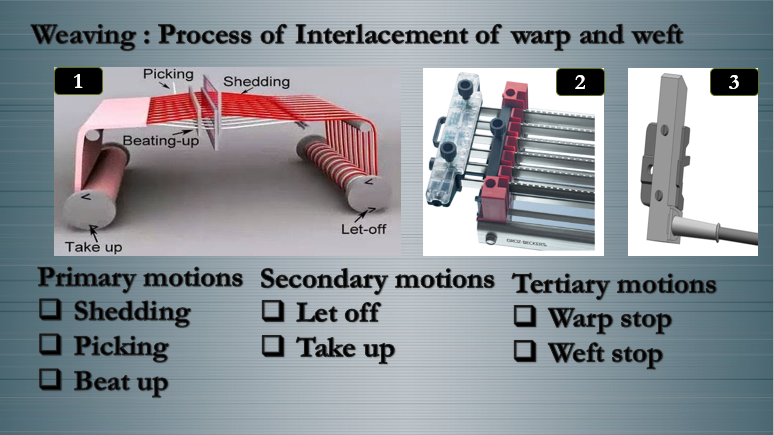 

# Typical Data Generated in weaving facility

#### 1.Fabric Production
#### 2.Machine Efficiency
#### 3.RPM
#### 4.Warp stop & Warp Cmpx
#### 5.Weft stop & Weft Cmpx
#### 6.Other stop
#### 7.Machine run hour
#### 8.Rejection data
#### 9.Wastage data
#### 10.Process loss data
#### 11.Troubleshooting and maintenance data
#### 12.Manpower performance data
#### 13.Knotting,drawing and others data
#### 14.Fabic delivery report
#### 15.Article specification(construction,EPI,PPI,RS,Color etc)
#### 16.Temperature and humidity data
#### 17.Power & air consumption

## There are also many more,Using data driven decision making we can get the most out of these data,So in this notebook some exploratory data analysis is done to make meaningfull insights from these data

# we will use python programming for exploratory analysis and vizualization of data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Fault details.csv")
df

,Unit,Date,StyleNo,SetNo,SS,Loom,Beam,OName,WeavDate,ShiftName,...,DName,ProdB,Unnamed: 14,ProdC,Unnamed: 16,CutPieece,Unnamed: 18,Wastage,Unnamed: 20,Total
0,Denim-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,01-Apr-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,S3576,15564.0,4.0,K-6,145,Soyeb,NaN,C,...,Dyeing,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,6.0
3,NaN,NaN,F1003XS3D,15563.0,5.0,I-6,552,Aminul,NaN,A,...,Dyeing,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,6.0
4,NaN,NaN,S5216,63821.0,3.0,C-1,R-27,Hojrul,NaN,C,...,Dyeing,NaN,NaN,18.00,NaN,NaN,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,NaN,NaN,MIXED,50002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Weaving,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,3.0
27326,NaN,NaN,MIXED,50002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Finishing,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,4.0
27327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Text114:,98.00,Text132:,42.00,Text136:,11.00,NaN
27328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Text140:,237.00,Text142:,42.00,Text143:,35.00,NaN


# Data Cleaning

In [4]:
df2=df[["Unit","Date","StyleNo","SetNo","FType","DName","ProdB","ProdC","CutPieece","Wastage","Total"]]
df2["Unit"].fillna(method="ffill",inplace=True)
df2["Date"].fillna(method="ffill",inplace=True)
df2=df2.iloc[1:-1,:]
df2=df2[df2["StyleNo"].notna()]
df2=df2.fillna(0)
df2["ProdB"]=pd.to_numeric(df2["ProdB"])
df2["ProdC"]=pd.to_numeric(df2["ProdC"])
df2["CutPieece"]=pd.to_numeric(df2["CutPieece"])
df2["Wastage"]=pd.to_numeric(df2["Wastage"])
df2["Total"]=pd.to_numeric(df2["Total"])
df2.rename(columns = {'ProdB':'B+','FType':'Fault', 'ProdC':'B','CutPieece':'Cut_piece','Wastage':'Jute/moni'}, inplace = True)
df2["Date"] = pd.to_datetime(df2["Date"])

C:\Users\Takrib\AppData\Local\Temp\ipykernel_4440\639958115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Unit"].fillna(method="ffill",inplace=True)
C:\Users\Takrib\AppData\Local\Temp\ipykernel_4440\639958115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"].fillna(method="ffill",inplace=True)


In [5]:
df2

,Unit,Date,StyleNo,SetNo,Fault,DName,B+,B,Cut_piece,Jute/moni,Total
2,Denim-1,2022-04-01,S3576,15564.0,Loose End (Dye),Dyeing,0.0,0.0,6.0,0.0,6.0
3,Denim-1,2022-04-01,F1003XS3D,15563.0,Loose End (Dye),Dyeing,0.0,0.0,6.0,0.0,6.0
4,Denim-1,2022-04-01,S5216,63821.0,Loose End (Dye),Dyeing,0.0,18.0,0.0,0.0,18.0
5,Denim-1,2022-04-01,1003YS6B,63833.0,Loose End (Dye),Dyeing,0.0,0.0,14.0,0.0,14.0
6,Denim-1,2022-04-01,F1003XS3D,15563.0,Loose End (Dye),Dyeing,0.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
27322,Out Source,2022-06-23,S3587-SP,50171.0,Crease Mark,Finishing,0.0,0.0,31.0,0.0,31.0
27323,Out Source,2022-06-23,S3587-SP,50112.0,Crease Mark,Finishing,0.0,0.0,11.0,0.0,11.0
27324,Out Source,2022-06-23,MIXED,50002.0,Jute/Moni (Dye),Dyeing,0.0,0.0,0.0,4.0,4.0
27325,Out Source,2022-06-23,MIXED,50002.0,Jute/Moni (Weav),Weaving,0.0,0.0,0.0,3.0,3.0


# Deprtment wise rejection Summary

In [5]:
department_wise_summary=df2.groupby(["DName"])[['B+', 'B','Cut_piece', 'Jute/moni', 'Total']].sum()
department_wise_summary


,B+,B,Cut_piece,Jute/moni,Total
DName,,,,,
Dyeing,993.0,55442.0,18836.0,26242.0,101513.0
Electrical,0.0,7063.0,0.0,0.0,7063.0
Finishing,0.0,34826.0,32993.0,27490.0,95309.0
Others,0.0,272.0,217.0,57.0,546.0
R&D,14.0,8138.0,8160.0,437.0,16749.0
Spinning,0.0,28032.0,3546.0,271.0,31849.0
Utility,0.0,30386.0,0.0,0.0,30386.0
Warping,0.0,1226.0,236.0,4.0,1466.0
Weaving,1356.0,33890.0,9053.0,22226.0,66525.0


# Unit wise Rejection

      Unit     B+        B  Cut_piece  Jute/moni     Total
0  Denim-1  895.0  79644.0    29395.0    34804.0  144738.0
1  Denim-2  929.0  86221.0    33093.0    37512.0  157755.0
2  Denim-3  539.0  33173.0    10511.0     4376.0   48599.0


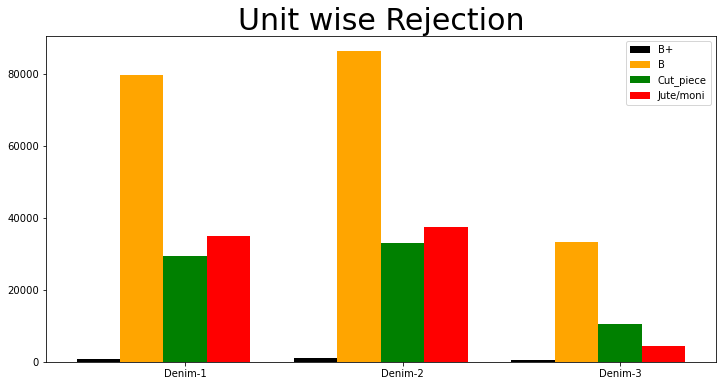

In [6]:
unit_wise_rejection=df2.groupby("Unit")[["B+","B","Cut_piece","Jute/moni","Total"]].sum()
unit_wise_rejection=pd.DataFrame(unit_wise_rejection)
unit_wise_rejection=unit_wise_rejection.reset_index()
unit_wise_rejection=unit_wise_rejection.drop(3)
print(unit_wise_rejection)

plt.figure(figsize=(12,6))
x=np.arange(3)
plt.bar(x-0.4, unit_wise_rejection["B+"], width=0.2, color='black')
plt.bar(x-0.2, unit_wise_rejection["B"], width=0.2, color='orange')
plt.bar(x, unit_wise_rejection["Cut_piece"], width=0.2, color='green')
plt.bar(x+0.2, unit_wise_rejection["Jute/moni"], width=0.2, color='red')
# plt.bar(x+0.4, a["Total"], width=0.2, color='violet')
plt.xticks(x,["Denim-1","Denim-2","Denim-3"])
plt.legend(["B+","B","Cut_piece","Jute/moni","Total"])
plt.title("Unit wise Rejection",fontsize=30)
plt.show()

# Floor wise contribution to total rejection for weaving

                      Total
Unit       DName           
Denim-1    Weaving  26253.0
Denim-2    Weaving  29520.0
Denim-3    Weaving  10741.0
Out Source Weaving     11.0


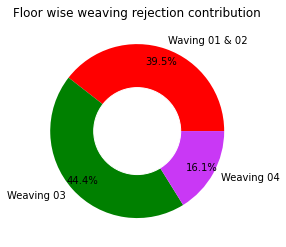

In [7]:
df_weaving=df2.loc[df2["DName"]=="Weaving"]
df_weaving=df_weaving.groupby(["Unit","DName"])["Total"].sum()
df_weaving=pd.DataFrame(df_weaving)
print(df_weaving.head())

# Donut chart 

data = [26253.0,29520.0,10741.0]
dept = ["Waving 01 & 02","Weaving 03","Weaving 04"]
explode = (0.0, 0, 0)
colors = ['#FF0000', 'green', '#c938f5']
plt.pie(data, explode = explode, labels = dept,autopct='%1.1f%%', pctdistance=0.85,colors=colors)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Floor wise weaving rejection contribution")
plt.show()

# Most vulnerable style for rejection

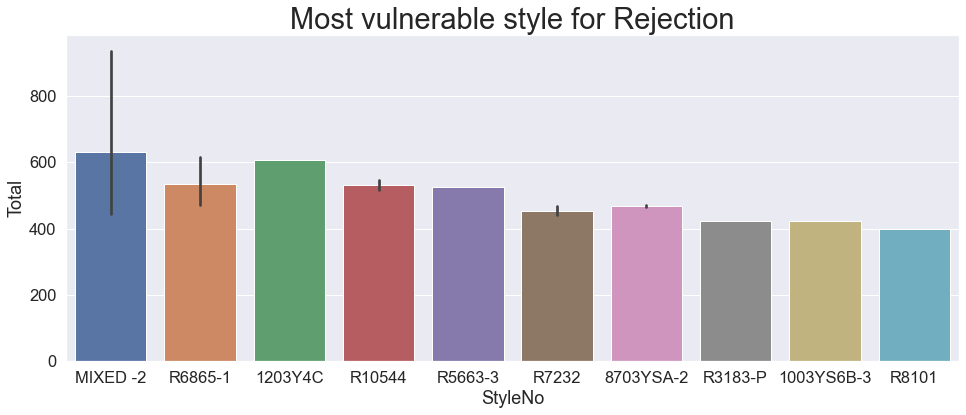

In [8]:
high_rejection=df2.sort_values(by=["Total"],ascending=False).head(28)
sns.set_style("darkgrid")
sns.set(font_scale = 1.5)
plt.figure(figsize=(16,6))
plt.title("Most vulnerable style for Rejection",fontsize=29)
sns.barplot(x=high_rejection["StyleNo"],y=high_rejection["Total"])
plt.show()

# Top rejected styles

In [15]:
style_rejection=high_rejection.groupby("StyleNo")[["B+","B","Cut_piece","Jute/moni","Total"]].sum().reset_index()
style_rejection=pd.DataFrame(high_rejection)

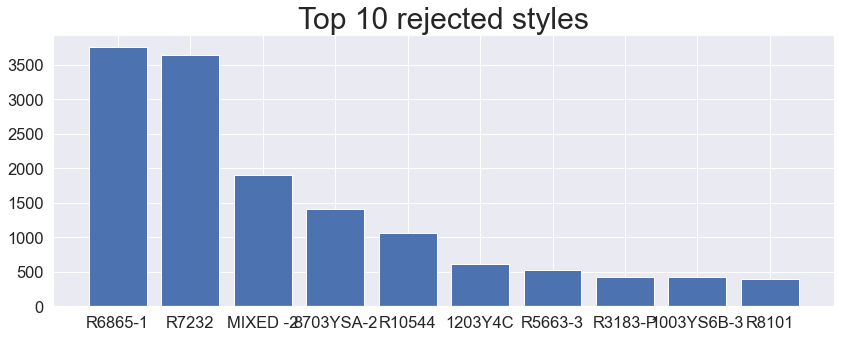

In [9]:
top_10_rejected_styles=high_rejection.groupby("StyleNo")["Total"].sum()
top_10_rejected_styles=pd.DataFrame(top_10_rejected_styles).reset_index()
top_10_rejected_styles=top_10_rejected_styles.sort_values(by="Total",ascending=False)
# print(top_10_rejected_styles
plt.figure(figsize=(14,5))
plt.bar(top_10_rejected_styles["StyleNo"],top_10_rejected_styles["Total"])
plt.title("Top 10 rejected styles",fontsize=30)
(plt.show())

# Which faults are contributing the biggest part

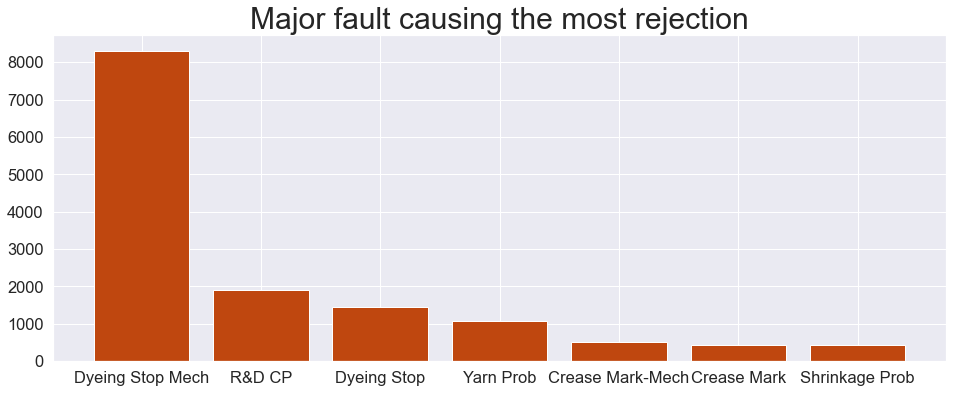

In [10]:
major_fault=high_rejection.groupby("Fault")["Total"].sum()
major_fault=pd.DataFrame(major_fault).reset_index()
major_fault=major_fault.sort_values(by="Total",ascending=False)
plt.figure(figsize=(16,6))
plt.bar(major_fault["Fault"],major_fault["Total"],color="#bf470f")
plt.title("Major fault causing the most rejection",fontsize=30)
plt.show()

# Rejection of the month of April

In [11]:
ff=df2.set_index("Date").sort_index()
april=ff['2022-04-01':'2022-04-30'].groupby("Date")["Total"].sum().reset_index()

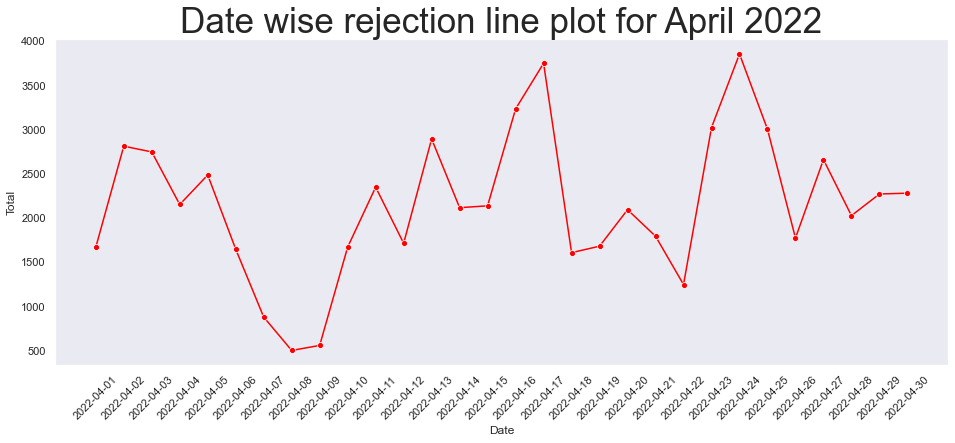

In [39]:
plt.figure(figsize=(,6))
sns.set_theme(style="dark")
sns.lineplot(x=april["Date"],y=april["Total"],color="red", marker="o")
plt.xticks(april["Date"],rotation=45)
plt.title("Date wise rejection line plot for April 2022",fontsize=35)
plt.show()

In [12]:
april=april["Total"].sum()
april

64678.0

In [13]:
may=pd.DataFrame(ff['2022-05-01':'2022-05-31'].groupby("Date")["Total"].sum())
may=may["Total"].sum()
may

56037.0

In [14]:
june=pd.DataFrame(ff['2022-06-01':'2022-06-30'].groupby("Date")["Total"].sum())
june=june["Total"].sum()
june

56374.0

In [15]:
july=pd.DataFrame(ff['2022-07-01':'2022-07-31'].groupby("Date")["Total"].sum())
july=july["Total"].sum()
july

37940.0

In [16]:
august=pd.DataFrame(ff['2022-08-01':'2022-08-31'].groupby("Date")["Total"].sum())
august=august["Total"].sum()
august

44138.0

In [17]:
september=pd.DataFrame(ff['2022-09-01':'2022-09-30'].groupby("Date")["Total"].sum())
september=september["Total"].sum()
september

47712.0

In [18]:
october=pd.DataFrame(ff['2022-10-01':'2022-10-31'].groupby("Date")["Total"].sum())
october=october["Total"].sum()
october

42276.0

In [19]:
df_month_rej = pd.DataFrame({
    "Month":["April","May","June","July","August","September","October"],
    "Total": [april,may,june,july,august,september,october]
})

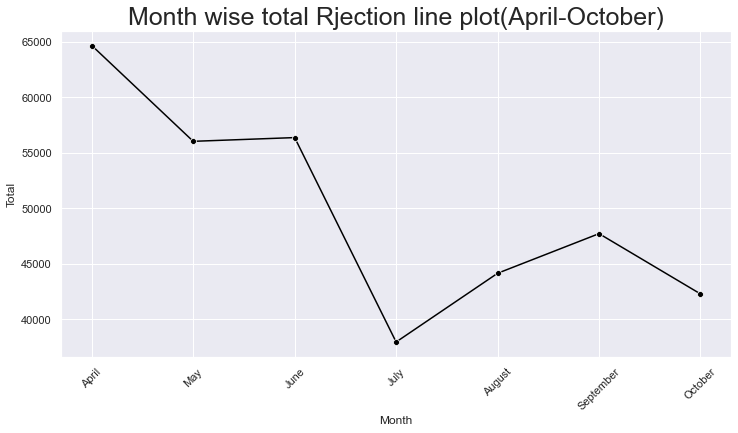

In [20]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x=df_month_rej["Month"],y=df_month_rej["Total"],color="black", marker="o")
plt.xticks(df_month_rej["Month"],rotation=45)
plt.title("Month wise total Rjection line plot(April-October)",fontsize=25)
plt.show()

# ECDF plot

In [21]:
ecdf_data=high_rejection.groupby("StyleNo")[["B+","B","Cut_piece","Jute/moni","Total"]].sum()
ecdf_data


,B+,B,Cut_piece,Jute/moni,Total
StyleNo,,,,,
1003YS6B-3,0.0,422.0,0.0,0.0,422.0
1203Y4C,0.0,606.0,0.0,0.0,606.0
8703YSA-2,0.0,1407.0,0.0,0.0,1407.0
MIXED -2,0.0,0.0,1895.0,0.0,1895.0
R10544,0.0,1063.0,0.0,0.0,1063.0
R3183-P,0.0,424.0,0.0,0.0,424.0
R5663-3,0.0,525.0,0.0,0.0,525.0
R6865-1,0.0,3747.0,0.0,0.0,3747.0
R7232,0.0,3635.0,0.0,0.0,3635.0


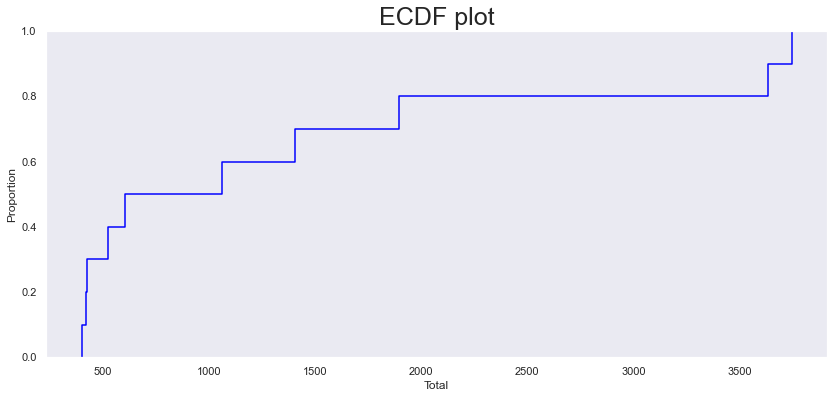

In [22]:
plt.figure(figsize=(14,6))
sns.set_theme(style="dark")
sns.ecdfplot(data=ecdf_data, x="Total",color="blue")
plt.title("ECDF plot",fontsize=25)
plt.show()

# Fault wise total rejection of a particular style

In [24]:
df_R7232=df2.loc[df2["DName"]=="Weaving"]
df_R7232=df2.loc[df2["StyleNo"]=="R7232"].groupby("Fault")[["B+","B","Cut_piece","Jute/moni","Total"]].sum()
df_R7232

,B+,B,Cut_piece,Jute/moni,Total
Fault,,,,,
Balls,0.0,18.0,0.0,0.0,18.0
Balls (Weav),0.0,7.0,0.0,0.0,7.0
Broken Pick,0.0,1115.0,359.0,5.0,1479.0
Color Spot (Finish),0.0,20.0,41.0,9.0,70.0
Color Spot (Weav),0.0,22.0,0.0,0.0,22.0
Crease Mark,0.0,1258.0,1965.0,73.0,3296.0
Crease Mark-Elec,0.0,199.0,0.0,0.0,199.0
Crease Mark-Mech,0.0,788.0,0.0,0.0,788.0
Cut Pick,0.0,756.0,0.0,0.0,756.0
